# Project Name - Health Insurance Cross Sell Prediction
## Project Type - Classification
## Contribution - Individual
## Name - Harshad Humane
## GitHub Link:
https://github.com/harshadhumane18/Health-Insurance-Cross-Sell-Predictions

## Project Overview:

The Health Insurance Cross Sell Predictions project aims to build a predictive model for an insurance company. The model will predict whether existing health insurance policyholders would be interested in the company’s vehicle insurance. This prediction is based on various customer details like demographics, vehicle information, and policy details.

## Problem statement:
The insurance company is seeking to expand its business by cross-selling vehicle insurance to its existing health insurance policyholders. However, reaching out to all customers without any insights can lead to ineffective communication and lower conversion rates. The challenge is to build a predictive model that can accurately identify customers who would be interested in vehicle insurance. This model should use available customer information such as demographics, vehicle details, and policy details. The successful development and implementation of this model will enable the company to optimize its communication strategy, enhance customer engagement, and increase revenue through effective cross-selling of vehicle insurance.

## Objective:
- The objective of this project is to help the insurance company optimize its business model and revenue. By predicting customer interest in vehicle insurance, the company can plan its communication strategy effectively. 
- This targeted approach can lead to higher cross-sell rates, enhancing the company’s growth and profitability. The project leverages data analysis and predictive modeling techniques to achieve this goal.

### Importing library

In [1]:
# Data manipulation and analysis
import pandas as pd  
import numpy as np  

# Data visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# Mathematical operations
import math  

# Statistical analysis
import scipy.stats as stats  

# Feature selection and preprocessing
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression  
from sklearn.model_selection import train_test_split  
from imblearn.over_sampling import SMOTE  
from sklearn.preprocessing import MinMaxScaler  

# Machine learning models
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import AdaBoostClassifier  
from xgboost import XGBClassifier  

# Model selection and evaluation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  
from sklearn.metrics import (f1_score, precision_score, recall_score, confusion_matrix,  
                             classification_report, accuracy_score, roc_auc_score, roc_curve, auc)

# Suppressing warnings
import warnings  
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
data = pd.read_csv('F:\\Alma better projects\\Health Insurance Cross Sell Prediction\\HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [3]:
# copying the data 
df = data.copy()

### Knowing your dataset

In [4]:
# first look of dataset
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# bottom look of dataset
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
# random look of dataset
df.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
331494,331495,Male,23,1,37.0,0,< 1 Year,No,43295.0,151.0,290,0
783,784,Male,24,1,8.0,1,< 1 Year,No,33265.0,152.0,57,0
380499,380500,Male,22,1,46.0,0,< 1 Year,Yes,34902.0,152.0,134,0
189123,189124,Male,60,1,29.0,1,1-2 Year,No,27741.0,4.0,283,0
363301,363302,Female,27,1,41.0,1,< 1 Year,No,19896.0,152.0,195,0


In [7]:
# Shape of the dataset
df.shape

(381109, 12)

In [8]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### Understanding the variables

In [9]:
# Dataset's attributes
df.columns.tolist()

['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

#### Attributes Information:
- id : Unique ID for customer

- Gender : Male/Female

- Age : Age of customer

- Driving License : Customer has DL or not

- Region_Code : Unique code for the region of the customer

- Previously_insured : Customer already has vehicle insurance or not

- Vehicle_age : Age of the vehicle

- Vehicle_damage : Past damages present or not

- Annual_premium : The amount customer needs to pay as premium

- PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc

- Vintage : Number of Days, Customer has been associated with the company

- Response : Customer is interested or not

In [10]:
# statistical description of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [11]:
# statistical description of non-numeric columns
df.describe(include=['object']).T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [12]:
# checking for unique values 
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

#### Checking for null values abd duplicate values

In [13]:
# null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

*~ There are no null values.*

In [14]:
# duplicate values

In [15]:
print(f'There are "{df.duplicated().sum()}" values in the dataset.')

There are "0" values in the dataset.


### Data Visualisation

#### Exploring Response variable

In [16]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

*0 - Indicates: not interested & 1 - Indicates: interested.*

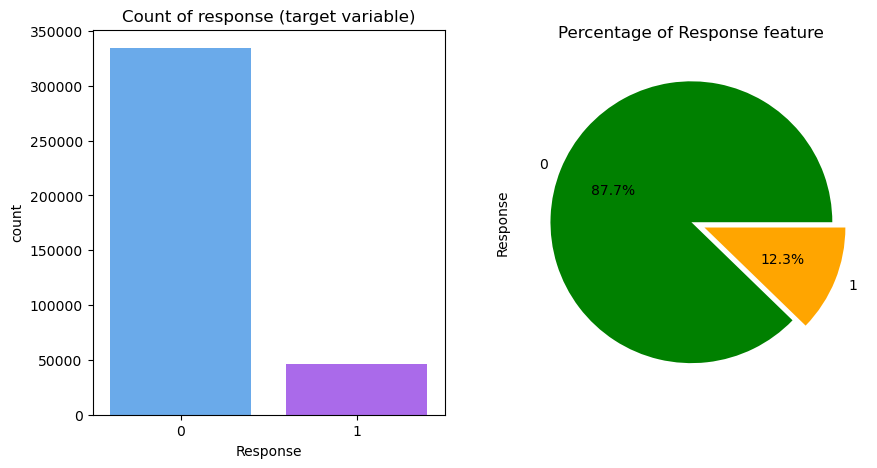

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)

sns.countplot(x=df['Response'], palette="cool")
plt.title("Count of response (target variable)")

plt.subplot(1,2,2)
count_res = df['Response'].value_counts()
count_res.plot.pie(autopct = '%1.1f%%',colors=['green','orange'],explode = [0.0,0.1],title = 'Percentage of Response feature')

plt.show()

*~ Observations:*
- The plot shows an imbalanced dataset with a majority (87.7%) having a response of 0 and a minority (12.3%) having a response of 1. This indicates that the event represented by response 1 is less frequent.

#### Exploring Gender variable 

In [18]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

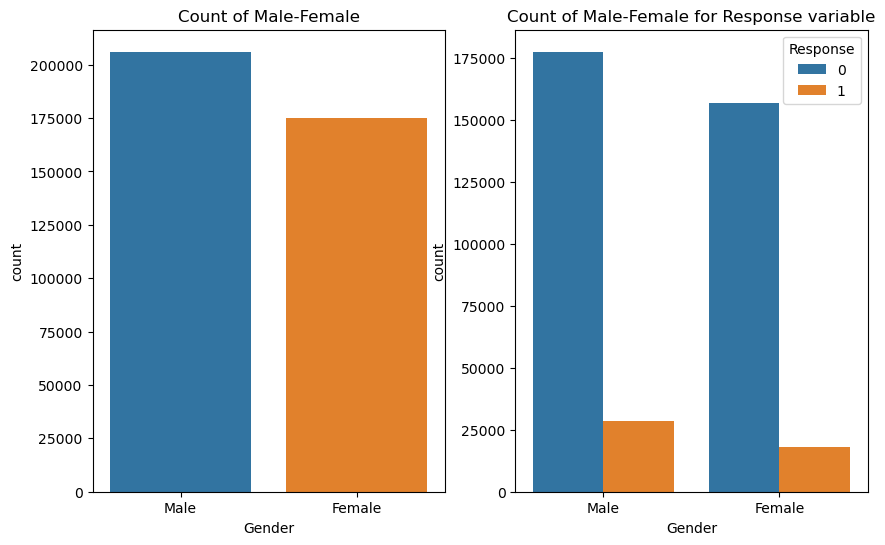

In [19]:
plt.figure(figsize=(10,6))

# for univariate analysis
plt.subplot(1,2,1)

sns.countplot(x=df['Gender'])
plt.title('Count of Male-Female')

# for bivariate analysis
plt.subplot(1,2,2)
sns.countplot(x=df['Gender'],hue=df['Response'])
plt.title('Count of Male-Female for Response variable')

plt.show()

*~ Observations:*
- The dataset has more males than females, with the count of males reaching up to 200,000 and females just below 175,000.

- Both genders show a low interest level in health insurance (response 1). However, the number of males showing interest is slightly higher than that of females.

#### Exploring the Age variable

In [20]:
# statistical analysis of Age variable
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

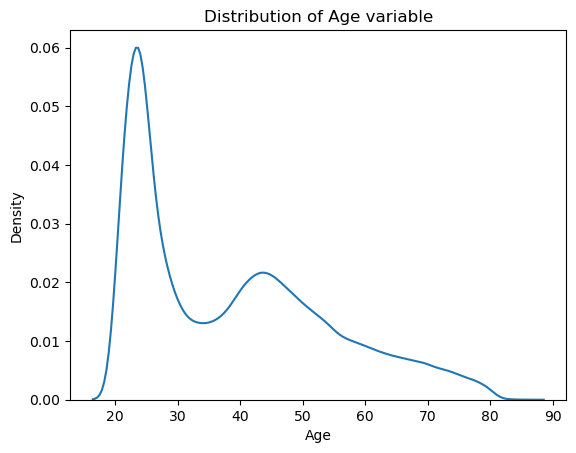

In [21]:
# distribution of age
sns.kdeplot(data=df,x='Age')
plt.title('Distribution of Age variable')
plt.show()

In [22]:
# df for interested response
interested_age = df[df['Response']==1]

# df for not interested response
not_interested_age = df[df['Response']==0]

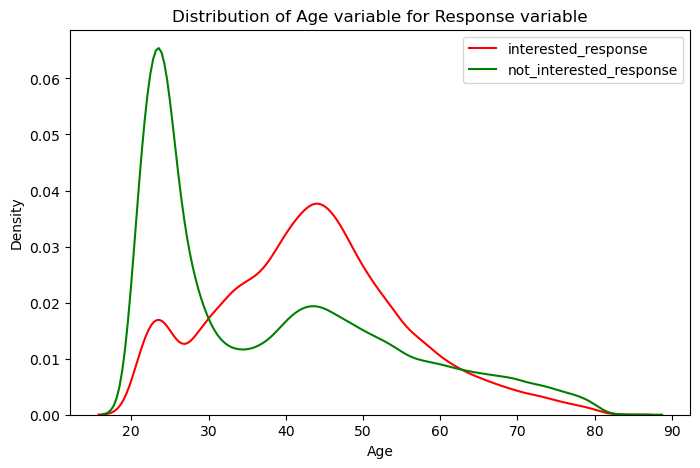

In [23]:
# plotting distribution for interested age and not interested age 
plt.figure(figsize=(8,5))
sns.distplot(interested_age['Age'],color='red' , label='interested_response',hist=False)
sns.distplot(not_interested_age['Age'],color='green' , label='not_interested_response',hist=False) 
plt.title('Distribution of Age variable for Response variable')
plt.legend()
plt.show()

*~ Observations:*
- Younger Population (around 20 years): There is a high density of individuals who are not interested in health insurance cross-sell. This suggests that younger individuals are less likely to be interested.

- Middle-aged Population (40-50 years): The density of individuals interested in health insurance cross-sell peaks in this age group. This indicates that middle-aged individuals are more likely to be interested in health insurance cross-sell.

- Older Population (above 50 years): Both interested and not interested responses decline after the age of 50. However, the decline is sharper for those who are interested. This suggests that interest in health insurance cross-sell decreases in the older population.

#### Exploring the Driving license variable

In [24]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

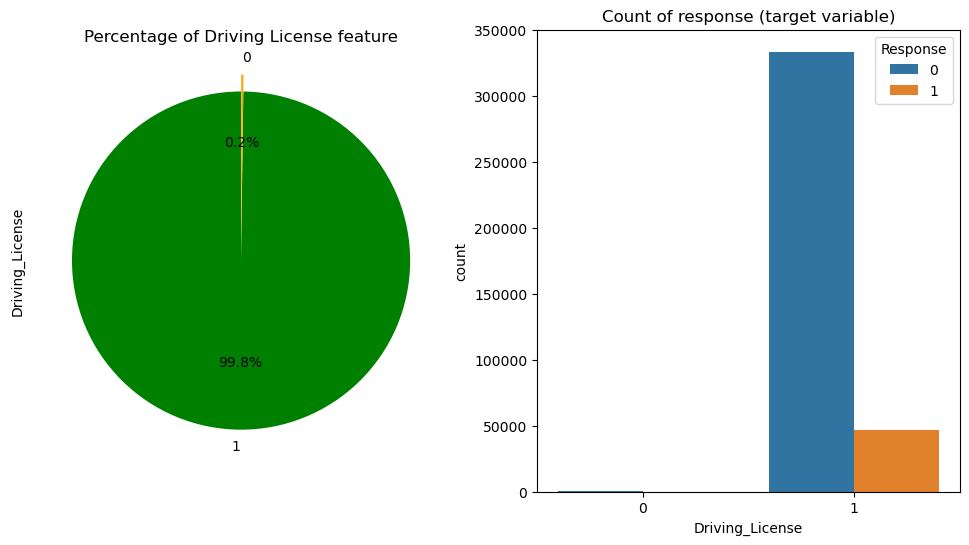

In [25]:
# plotting subplot for univariate analyisis of driving license and bivariate analysis with response variable
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
count_lic = df['Driving_License'].value_counts()
count_lic.plot.pie(autopct = '%1.1f%%',colors=['green','orange'],startangle=90,explode = [0.0,0.1],title = 'Percentage of Driving License feature')

plt.subplot(1,2,2)
sns.countplot(x='Driving_License', hue = 'Response',data = df)
plt.title("Count of response (target variable)")

plt.show()

*~ Observations:*
- A vast majority (99.8%) of the individuals in the dataset have a driving license. This suggests that most of the potential customers for cross-selling health insurance are licensed drivers.

- Among those with a driving license, a small proportion showed interest (Response: 1) in health insurance cross-sell predictions. This indicates that having a driving license does not necessarily correlate with interest in health insurance.

- The response from individuals without a driving license is negligible due to their very low representation (0.2%) in the dataset.

#### Exploring Region Code variable

In [26]:
# unique values of Region code
df['Region_Code'].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

<Figure size 1000x800 with 0 Axes>

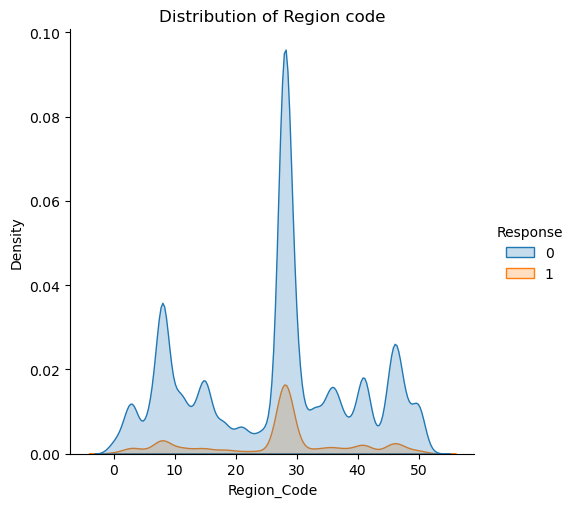

In [27]:
# Ditribution of region code based on Response variable

plt.figure(figsize=(10,8))
sns.displot(data=df,x='Region_Code', fill=True,hue = 'Response',kind='kde')
plt.title('Distribution of Region code')
plt.show()

In [28]:
# region code based on Interested(1) - Not interested(0)
reg = pd.DataFrame(pd.crosstab(df['Region_Code'],df['Response'])).sort_values(by=[1], ascending= False)
reg

Response,0,1
Region_Code,,
28.0,86498,19917
8.0,30620,3257
41.0,16039,2224
46.0,17717,2032
29.0,9700,1365
3.0,8070,1181
11.0,8191,1041
15.0,12350,958
30.0,11291,900


*~ Above data is Sorted based on interested response(1).*

In [29]:
# top 10 Region code based on interested response
reg_in = pd.DataFrame(reg[1]).head(10).reset_index()
reg_in

,Region_Code,1
0,28.0,19917
1,8.0,3257
2,41.0,2224
3,46.0,2032
4,29.0,1365
5,3.0,1181
6,11.0,1041
7,15.0,958
8,30.0,900
9,35.0,865


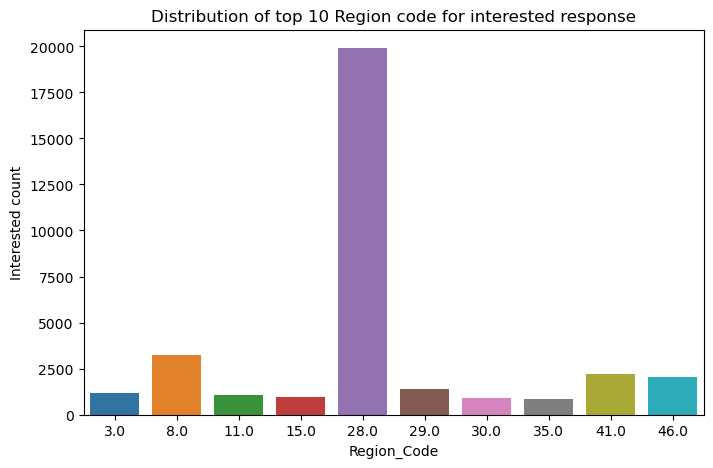

In [30]:
# plotting for top 10 Region code based on interested response

plt.figure(figsize=(8,5))
sns.barplot(data=reg_in,y=1,x='Region_Code')
plt.title('Distribution of top 10 Region code for interested response')
plt.ylabel('Interested count')
plt.show()

In [31]:
# top 10 Region code based on not interested response
a = pd.DataFrame(pd.crosstab(df['Region_Code'],df['Response'])).sort_values(by=[0], ascending= False).head(10)
reg_not_in = pd.DataFrame(a[0]).reset_index()
reg_not_in

,Region_Code,0
0,28.0,86498
1,8.0,30620
2,46.0,17717
3,41.0,16039
4,15.0,12350
5,30.0,11291
6,29.0,9700
7,50.0,9601
8,11.0,8191
9,36.0,8094


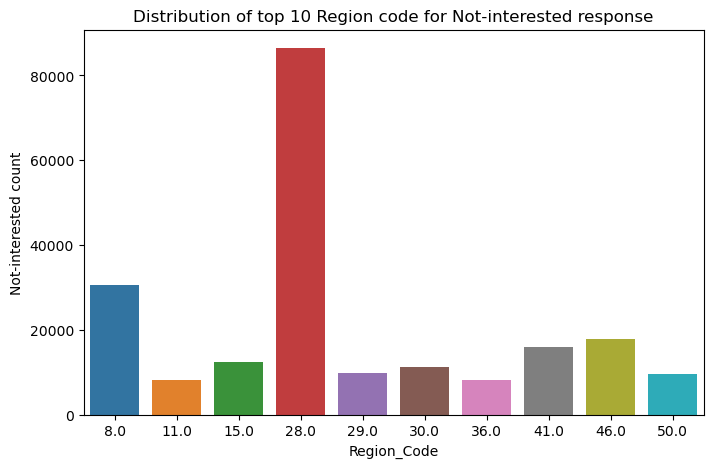

In [32]:
# plotting for top 10 Region code based on Not-interested response

plt.figure(figsize=(8,5))
sns.barplot(data=reg_not_in,y=0,x='Region_Code')
plt.title('Distribution of top 10 Region code for Not-interested response')
plt.ylabel('Not-interested count')
plt.show()

#### Exploring  Previously Insured variable

In [33]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

*~ 0 : No & 1 : Yes, for Previously Insured.*

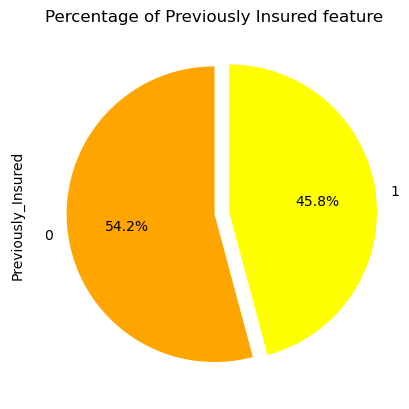

In [34]:
# plotting percentage of Previously Insured or not
count = df['Previously_Insured'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['orange','yellow'],startangle=90, explode = [0.0,0.1],title = 'Percentage of Previously Insured feature')
plt.show()

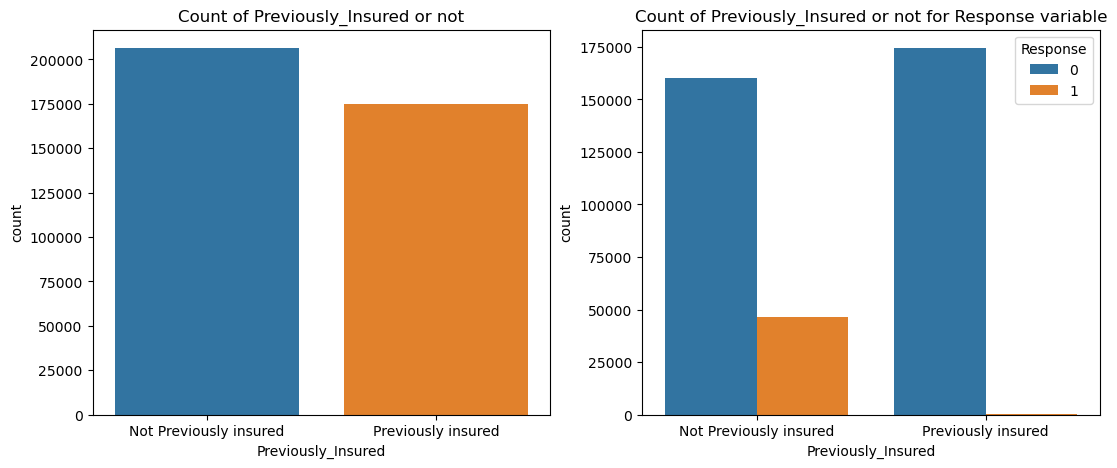

In [35]:
plt.figure(figsize=(13,5))

# for univariate analysis Previously Insured
plt.subplot(1,2,1)

sns.countplot(x=df['Previously_Insured'])
plt.title('Count of Previously_Insured or not')
plt.xticks(ticks=plt.xticks()[0], labels=['Not Previously insured', 'Previously insured'])

# for bivariate analysis of Previously Insured with response
plt.subplot(1,2,2)
sns.countplot(x=df['Previously_Insured'],hue=df['Response'])
plt.title('Count of Previously_Insured or not for Response variable')
plt.xticks(ticks=plt.xticks()[0], labels=['Not Previously insured', 'Previously insured'])

plt.show()

*~ Observations:*
- There are more individuals in the dataset who have not been previously insured compared to those who have been insured.
- Among those not previously insured, a small proportion is interested (Response 1) in health insurance cross-sell.
- Those who have had insurance before are less likely to be interested in additional health insurance offerings.

#### Exploring Vehicle Age  variable

In [36]:
# unique values from Vehicle age
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [37]:
# Values counts of Vehicle age
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

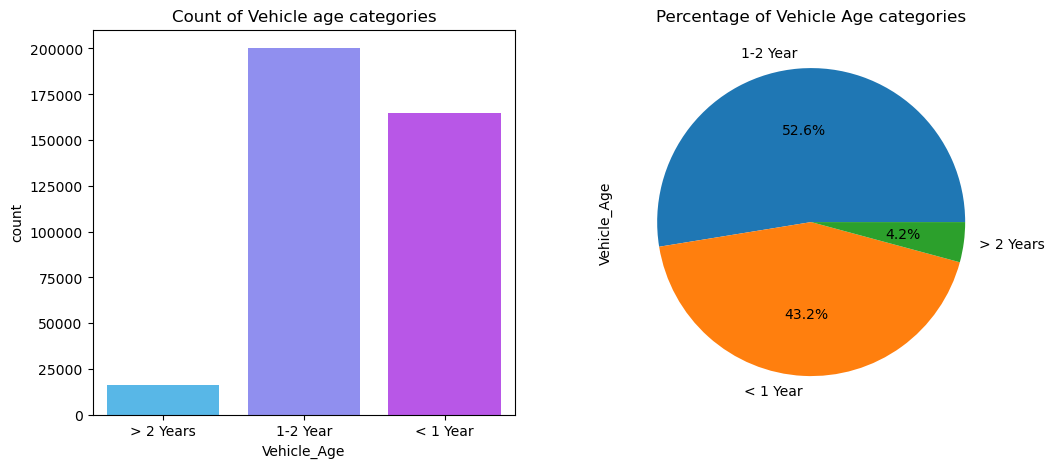

In [38]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)

sns.countplot(x=df['Vehicle_Age'], palette="cool")
plt.title("Count of Vehicle age categories")

plt.subplot(1,2,2)
count_res = df['Vehicle_Age'].value_counts()
count_res.plot.pie(autopct = '%1.1f%%',title = 'Percentage of Vehicle Age categories')

plt.show()

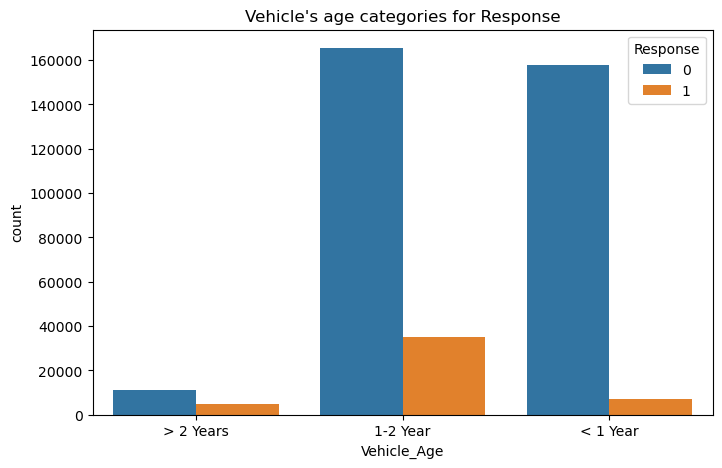

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(x='Vehicle_Age', hue='Response', data=df)
plt.title("Vehicle's age categories for Response" )
plt.show()

*~ Observations:*
- Owners of vehicles aged "1-2 Years" and "< 1 Year" show a higher vehicle count but lower interest in health insurance, implying reduced interest in additional coverage for newer vehicles. 
- Conversely, the small population with vehicles aged "> 2 Years" displays a higher interest in health insurance, suggesting potential receptiveness to insurance cross-sell in older vehicle owners.

#### Exploring Vehicle Damage  variable

In [40]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

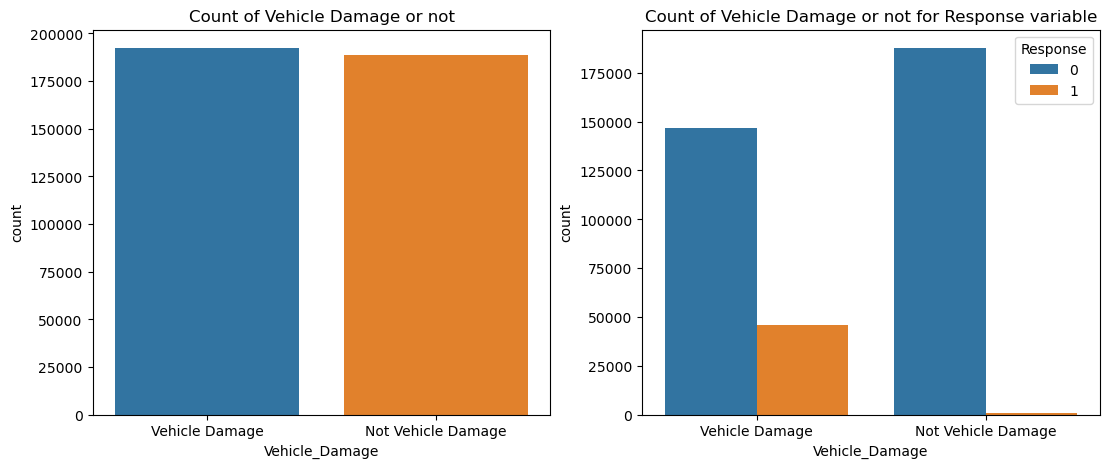

In [41]:
plt.figure(figsize=(13,5))

# for univariate analysis Vehicle Damage
plt.subplot(1,2,1)

sns.countplot(x=df['Vehicle_Damage'])
plt.title('Count of Vehicle Damage or not')
plt.xticks(ticks=plt.xticks()[0], labels=['Vehicle Damage', 'Not Vehicle Damage'])

# for bivariate analysis of Vehicle Damage with response
plt.subplot(1,2,2)
sns.countplot(x=df['Vehicle_Damage'],hue=df['Response'])
plt.title('Count of Vehicle Damage or not for Response variable')
plt.xticks(ticks=plt.xticks()[0], labels=['Vehicle Damage', 'Not Vehicle Damage'])

plt.show()

*~ Observations:*
- The dataset shows a near-even split between individuals with and without vehicle damage.

- Those with vehicle damage exhibit notable interest (Response 1) in health insurance cross-selling. This suggests a higher likelihood of interest in health insurance among individuals who have encountered vehicle damage.

- Individuals without vehicle damage display lower interest in health insurance cross-selling. This might signify that those without prior damage perceive less necessity for additional health insurance offerings.

#### Exploring Annual Premium variable

In [42]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Figure size 500x500 with 0 Axes>

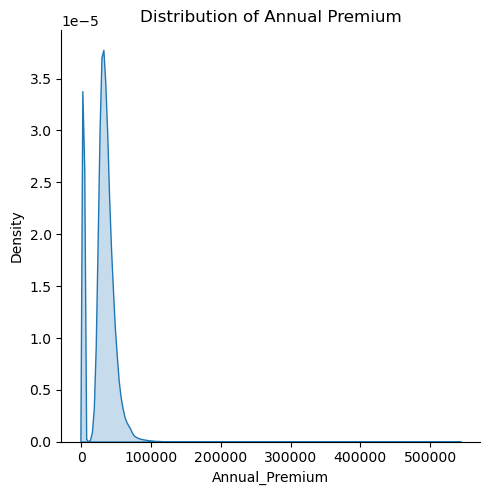

In [43]:
plt.figure(figsize=(5,5))

# Ditribution of  Annual Premium variable

sns.displot(data=df,x='Annual_Premium', fill=True,kind='kde')
plt.title('Distribution of Annual Premium')
plt.show()

#### Exploring  Vintage variable

In [44]:
df['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

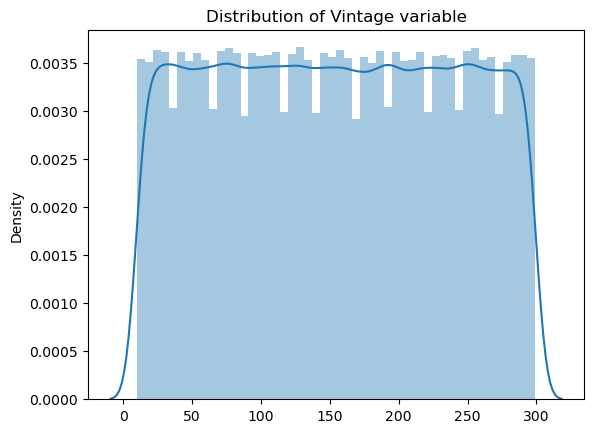

In [45]:
sns.distplot(x=df['Vintage'])
plt.title('Distribution of Vintage variable')
plt.show()

#### Correlation plot

In [46]:
# df.drop(columns = ['id', 'Driving_License'], inplace = True)

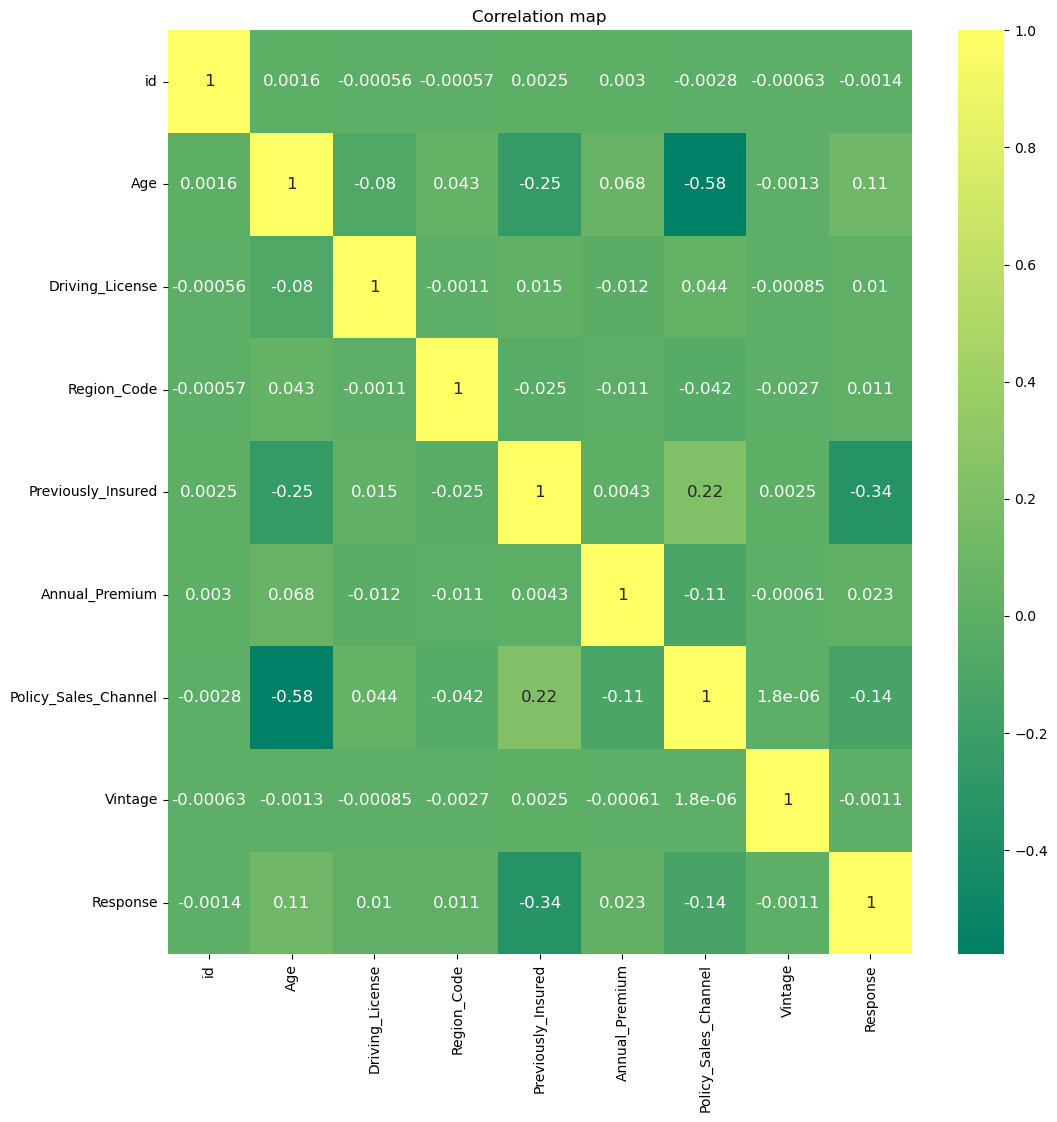

In [47]:
plt.figure(figsize=(12,12))
corr = df.corr()
sns.heatmap(corr, annot=True, annot_kws={"fontsize":12},cmap='summer')
plt.title('Correlation map')
plt.show()

### Handling outliers

In [48]:
def iqr_whisker(data):
    
    ''' function calculates the Interquartile Range (IQR) and the lower and upper whiskers for a given data set'''
    
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    print (f'IQR = {iqr}')
    print (f'lower_whisker = {lower_whisker}')
    print (f'upper_whisker = {upper_whisker}')

#### Checking Age variable

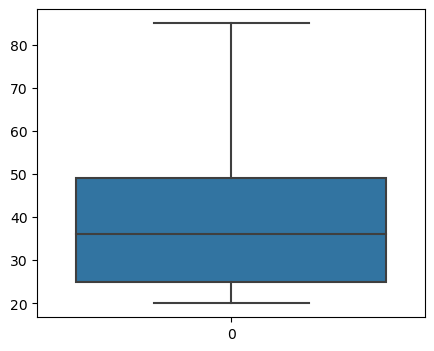

In [49]:
plt.figure(figsize=(5,4))
sns.boxplot(df.Age)
plt.show()

*~ There are no outliers found in Age variable.*

#### Checking Annual Premium variable

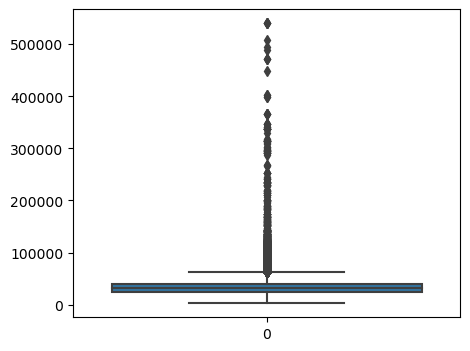

In [50]:
plt.figure(figsize=(5,4))
sns.boxplot(df.Annual_Premium)
plt.show()

*~ Observation:*
- This suggests that your data is right-skewed, meaning there are a few unusually large values.

- The log transformation is a powerful tool for dealing with skewed data. It can help to pull in those large values, reducing skewness and making the data more symmetric.

- After the log transformation, we apply the IQR method to further deal with outliers.

In [51]:
# Applying log transformation 

In [52]:
# Applying log transformation
df['Annual_Premium']=np.log(df['Annual_Premium'])

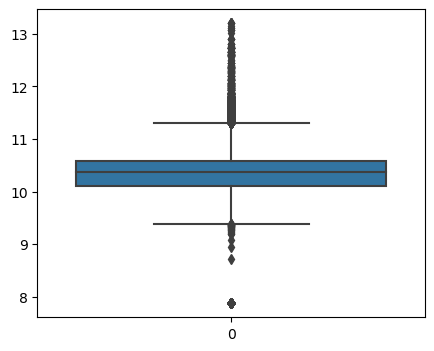

In [53]:
plt.figure(figsize=(5,4))
sns.boxplot(df.Annual_Premium)
plt.show()

In [54]:
# now applying function calculates the Interquartile Range (IQR) and the lower and upper whiskers.
iqr_whisker(df['Annual_Premium'])

IQR = 0.47897778696477644
lower_whisker = 9.384076627874084
upper_whisker = 11.29998777573319


In [55]:
# handling outliers
df.loc[df['Annual_Premium']>11.3,'Annual_Premium']=11.3
df.loc[df['Annual_Premium']<9.4,'Annual_Premium']=9.4

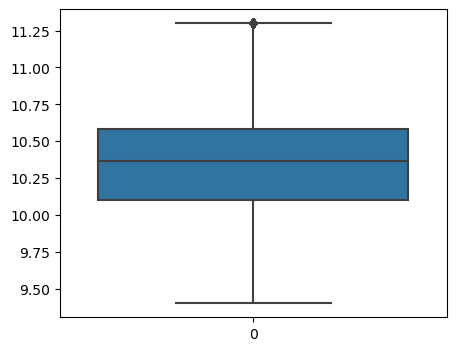

In [56]:
plt.figure(figsize=(5,4))
sns.boxplot(df.Annual_Premium)
plt.show()

#### Checking Vintange variable

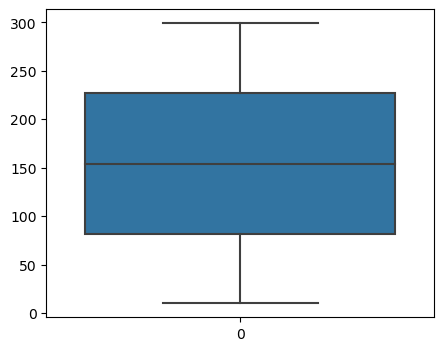

In [57]:
plt.figure(figsize=(5,4))
sns.boxplot(df.Vintage)
plt.show()

*~ There are no outliers found in Age variable.*

### Hypothesis Testing

**Hypothesis 1:** Does age have a significant impact on the interest in health insurance?

- Null Hypothesis (H0): There is no difference in the mean age of those interested and not interested in health insurance. In other words, age has no impact on the interest in health insurance.
- Alternative Hypothesis (H1): There is a difference in the mean age of those interested and not interested in health insurance. This would suggest that age does have an impact on the interest in health insurance.


In [58]:
# Define the two groups
group1 = df[df['Response'] == 1]['Age']
group2 = df[df['Response'] == 0]['Age']

# Perform t-test
t_stat, p_val = stats.ttest_ind(group1, group2)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

# Interpret result
if p_val < 0.05:
    print("Reject the null hypothesis. Age does have an impact on the interest in health insurance.")
else:
    print("Fail to reject the null hypothesis. Age has no impact on the interest in health insurance.")

T-statistic: 69.04306475777734
P-value: 0.0
Reject the null hypothesis. Age does have an impact on the interest in health insurance.


**Hypothesis 2:** Are individuals with vehicle damage more likely to be interested in health insurance?

- Null Hypothesis (H0): There is no association between vehicle damage and interest in health insurance. This means that having vehicle damage does not make an individual more or less likely to be interested in health insurance.
- Alternative Hypothesis (H1): There is an association between vehicle damage and interest in health insurance. This would suggest that individuals with vehicle damage are more likely to be interested in health insurance.

In [59]:
# Create a contingency table
contingency_table = pd.crosstab(df['Vehicle_Damage'], df['Response'])

# Perform Chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2_stat}')
print(f'P-value: {p_val}')

# Interpret result
if p_val < 0.05:
    print("Reject the null hypothesis. There is an association between vehicle damage and interest in health insurance.")
else:
    print("Fail to reject the null hypothesis. There is no association between vehicle damage and interest in health insurance.")

Chi-square statistic: 47864.76180117493
P-value: 0.0
Reject the null hypothesis. There is an association between vehicle damage and interest in health insurance.


### Converting categorical columns into numeric

In [60]:
# columns to consider: Gender, Vehicle_Age, Vehicle_Damage

In [61]:
# Mapping replacements using dictionaries
vehicle_age_map = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
gender_map = {'Male': 1, 'Female': 2}
vehicle_damage_map = {'Yes': 1, 'No': 0}


df['Vehicle_Age'] = df['Vehicle_Age'].map(vehicle_age_map)
df['Gender'] = df['Gender'].map(gender_map)
df['Vehicle_Damage'] = df['Vehicle_Damage'].map(vehicle_damage_map)

In [62]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,10.607921,26.0,217,1
1,2,1,76,1,3.0,0,1,0,10.420375,26.0,183,0
2,3,1,47,1,28.0,0,2,1,10.553049,26.0,27,1
3,4,1,21,1,11.0,1,0,0,10.261826,152.0,203,0
4,5,2,29,1,41.0,1,0,0,10.221796,152.0,39,0


### Feature Selction

In [63]:
X=df.drop(['Response'],axis=1)
y=df['Response']

##### Using Information gain

<Axes: >

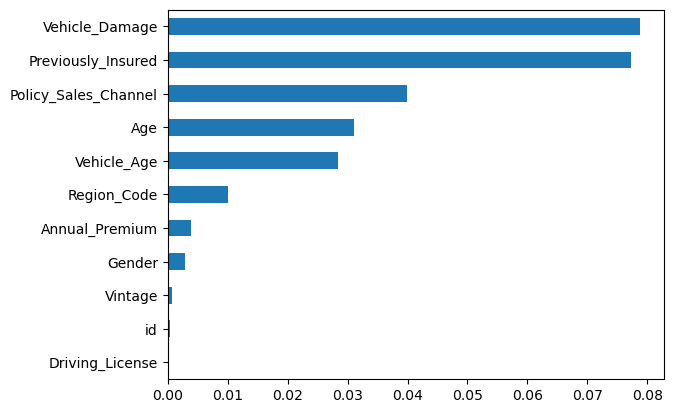

In [64]:
array = mutual_info_regression(X,y)
s1 = pd.Series(array, index=X.columns)
s1.sort_values().plot(kind='barh')

In [65]:
# Droping unwanted column
df.drop(['id','Driving_License','Vintage'],axis=1)

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1,44,28.0,0,2,1,10.607921,26.0,1
1,1,76,3.0,0,1,0,10.420375,26.0,0
2,1,47,28.0,0,2,1,10.553049,26.0,1
3,1,21,11.0,1,0,0,10.261826,152.0,0
4,2,29,41.0,1,0,0,10.221796,152.0,0
...,...,...,...,...,...,...,...,...,...
381104,1,74,26.0,1,1,0,10.314603,26.0,0
381105,1,30,37.0,1,0,0,10.597035,152.0,0
381106,1,21,30.0,1,0,0,10.466469,160.0,0
381107,2,68,14.0,0,2,1,10.705870,124.0,0


### Train Test Split with Feature scaling

In [66]:
X=df.drop(['Response'],axis=1)
y=df['Response']

In [67]:
# Split the data without oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Oversample the minority class using SMOTE
sm=SMOTE()
X_Over,y_Over=sm.fit_resample(X_train,y_train)

In [69]:
# Split the oversampled data
X_Over_train,X_Over_test,y_Over_train,y_Over_test = train_test_split(X_Over, y_Over, test_size=0.2, random_state=42)

### Model building

*Models using:*
1. Logistic regression
2. KNN
3. DecisionTree
4. Random forest
5. Xgboost
    
    
    

In [70]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
    
    ''' Function to evaluate the classification model based on classification report, accuracy score, and confusion matrix'''
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate performance metrics
    print("Training Performance:")
    print(classification_report(y_train, y_pred_train))
    
    print('*'*50)
    
    print("Testing Performance:")
    print(classification_report(y_test, y_pred_test))
    
    # Calculate and print accuracy score
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Testing Accuracy: {test_accuracy:.4f}')
    
    # Plot confusion matrix for testing set
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='summer', cbar=True,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Testing Set')
    plt.show()

### 1. Logistic regression

#### without oversampling

In [71]:
lr=LogisticRegression()

Training Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    267700
           1       0.00      0.00      0.00     37187

    accuracy                           0.88    304887
   macro avg       0.44      0.50      0.47    304887
weighted avg       0.77      0.88      0.82    304887

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

Training Accuracy: 0.8780
Testing Accuracy: 0.8751


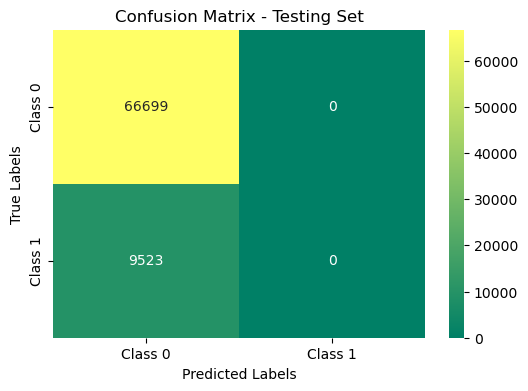

In [72]:
evaluate_model(lr,X_train,X_test,y_train,y_test)

#### with oversampling

In [73]:
lr=LogisticRegression()

Training Performance:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60    214235
           1       0.58      0.50      0.54    214085

    accuracy                           0.57    428320
   macro avg       0.57      0.57      0.57    428320
weighted avg       0.57      0.57      0.57    428320

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.57      0.65      0.60     53465
           1       0.59      0.51      0.54     53615

    accuracy                           0.58    107080
   macro avg       0.58      0.58      0.57    107080
weighted avg       0.58      0.58      0.57    107080

Training Accuracy: 0.5714
Testing Accuracy: 0.5759


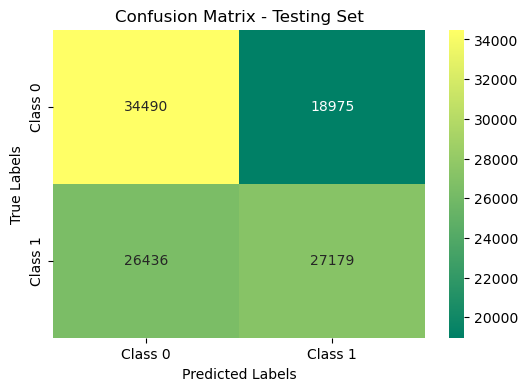

In [74]:
evaluate_model(lr,X_Over_train,X_Over_test,y_Over_train,y_Over_test)

### 2. KNN

#### without oversampling

In [75]:
knn = KNeighborsClassifier()

Training Performance:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    267700
           1       0.62      0.11      0.19     37187

    accuracy                           0.88    304887
   macro avg       0.76      0.55      0.56    304887
weighted avg       0.86      0.88      0.85    304887

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66699
           1       0.17      0.03      0.05      9523

    accuracy                           0.86     76222
   macro avg       0.53      0.50      0.49     76222
weighted avg       0.79      0.86      0.82     76222

Training Accuracy: 0.8836
Testing Accuracy: 0.8619


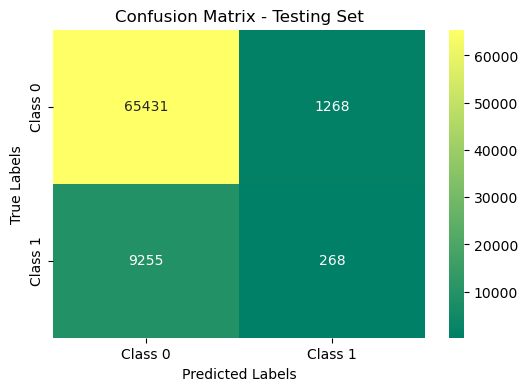

In [76]:
evaluate_model(knn,X_train, X_test, y_train, y_test)

#### with oversampling

In [77]:
knn = KNeighborsClassifier()

Training Performance:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84    214235
           1       0.79      0.97      0.87    214085

    accuracy                           0.86    428320
   macro avg       0.87      0.86      0.85    428320
weighted avg       0.87      0.86      0.85    428320

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.90      0.65      0.75     53465
           1       0.73      0.93      0.82     53615

    accuracy                           0.79    107080
   macro avg       0.81      0.79      0.79    107080
weighted avg       0.81      0.79      0.79    107080

Training Accuracy: 0.8560
Testing Accuracy: 0.7897


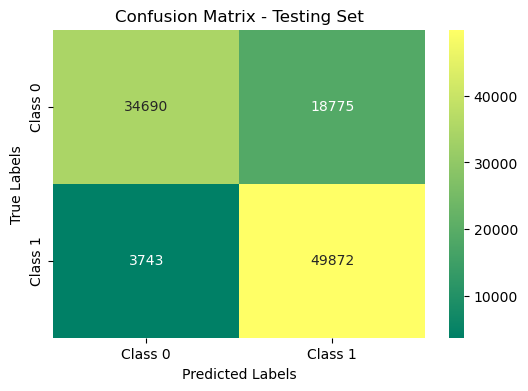

In [78]:
evaluate_model(knn,X_Over_train,X_Over_test,y_Over_train,y_Over_test)

### 3. DecisionTree

#### without oversampling

In [79]:
dt = DecisionTreeClassifier()

Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267700
           1       1.00      1.00      1.00     37187

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66699
           1       0.29      0.30      0.30      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222

Training Accuracy: 1.0000
Testing Accuracy: 0.8216


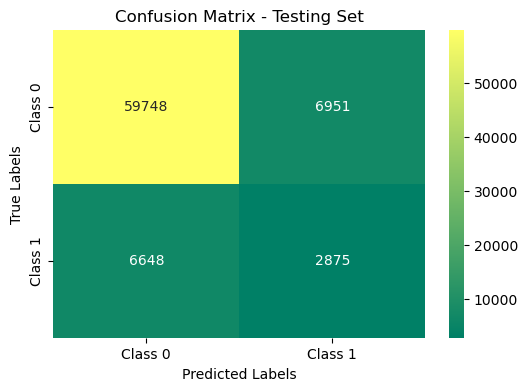

In [80]:
evaluate_model(dt,X_train, X_test, y_train, y_test)

#### with oversampling

In [81]:
dt = DecisionTreeClassifier()

Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214235
           1       1.00      1.00      1.00    214085

    accuracy                           1.00    428320
   macro avg       1.00      1.00      1.00    428320
weighted avg       1.00      1.00      1.00    428320

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     53465
           1       0.87      0.88      0.87     53615

    accuracy                           0.87    107080
   macro avg       0.87      0.87      0.87    107080
weighted avg       0.87      0.87      0.87    107080

Training Accuracy: 1.0000
Testing Accuracy: 0.8732


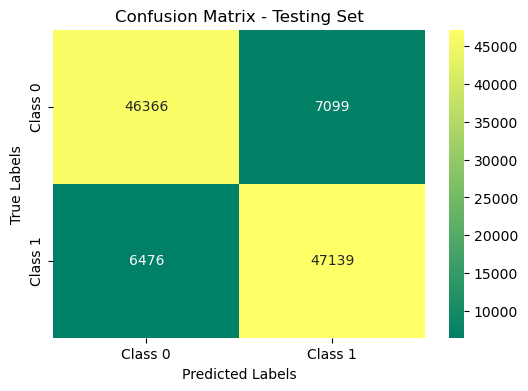

In [82]:
evaluate_model(dt,X_Over_train,X_Over_test,y_Over_train,y_Over_test)

#### Hyperparameter tunning

In [83]:
# Hyperparameter tunning 
param_grid={'criterion': ['gini', 'entropy'],
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100]}

In [84]:
clf = GridSearchCV(dt, param_grid = param_grid, cv =2, verbose=True, n_jobs=-1) 

In [85]:
best_clf = clf.fit(X_Over_train,y_Over_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


In [86]:
best_params = best_clf.best_estimator_
best_params

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=50)

In [87]:
# Decision Tree with Hyperparameter

dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20)

Training Performance:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    214235
           1       0.90      0.90      0.90    214085

    accuracy                           0.90    428320
   macro avg       0.90      0.90      0.90    428320
weighted avg       0.90      0.90      0.90    428320

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     53465
           1       0.88      0.88      0.88     53615

    accuracy                           0.88    107080
   macro avg       0.88      0.88      0.88    107080
weighted avg       0.88      0.88      0.88    107080

Training Accuracy: 0.8956
Testing Accuracy: 0.8806


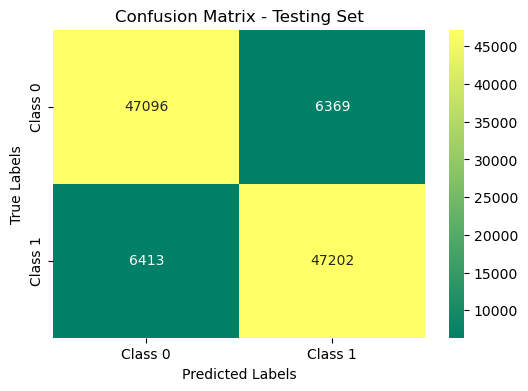

In [88]:
evaluate_model(dt_model,X_Over_train,X_Over_test,y_Over_train,y_Over_test)

### 4. Random forest

#### without oversampling

In [89]:
rf = RandomForestClassifier()

Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267700
           1       1.00      1.00      1.00     37187

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66699
           1       0.41      0.07      0.13      9523

    accuracy                           0.87     76222
   macro avg       0.65      0.53      0.53     76222
weighted avg       0.82      0.87      0.83     76222

Training Accuracy: 1.0000
Testing Accuracy: 0.8710


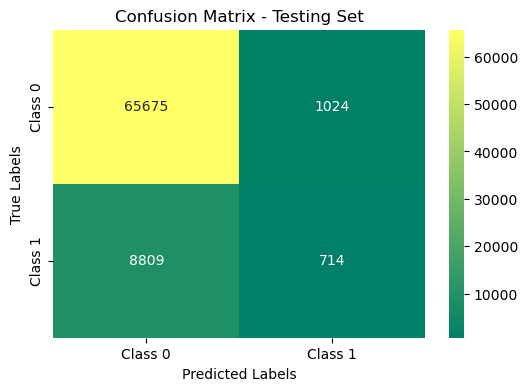

In [90]:
evaluate_model(rf,X_train, X_test, y_train, y_test)

#### with oversampling

In [91]:
rf = RandomForestClassifier()

Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214235
           1       1.00      1.00      1.00    214085

    accuracy                           1.00    428320
   macro avg       1.00      1.00      1.00    428320
weighted avg       1.00      1.00      1.00    428320

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     53465
           1       0.89      0.90      0.89     53615

    accuracy                           0.89    107080
   macro avg       0.89      0.89      0.89    107080
weighted avg       0.89      0.89      0.89    107080

Training Accuracy: 1.0000
Testing Accuracy: 0.8929


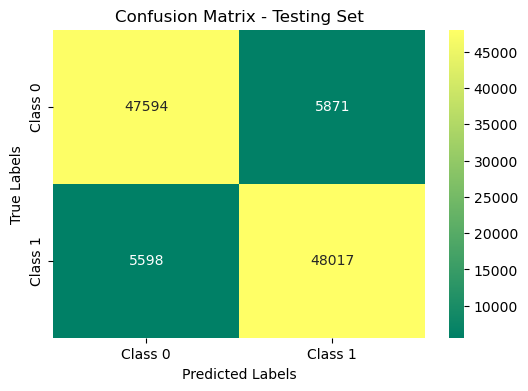

In [92]:
evaluate_model(rf,X_Over_train,X_Over_test,y_Over_train,y_Over_test)

#### Hyperparameter tunning

In [93]:
# Hyperparameter tunning 
param_grid={'n_estimators': [50, 100, 150, 200, 250], 
            'criterion' :['gini', 'entropy'],
            'max_depth': [10, 20, 50, 60, 80] }

In [94]:
clf = RandomizedSearchCV(rf, param_distributions = param_grid, cv =2, verbose=True, n_jobs=-1)

In [95]:
best_clf = clf.fit(X_Over_train,y_Over_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [97]:
best_params_ = best_clf.best_estimator_
best_params_

RandomForestClassifier(max_depth=50, n_estimators=200)

In [98]:
# Random Forest with hyperparameter
rf_model = RandomForestClassifier(max_depth=50, n_estimators=200)

Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214235
           1       1.00      1.00      1.00    214085

    accuracy                           1.00    428320
   macro avg       1.00      1.00      1.00    428320
weighted avg       1.00      1.00      1.00    428320

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     53465
           1       0.89      0.90      0.89     53615

    accuracy                           0.89    107080
   macro avg       0.89      0.89      0.89    107080
weighted avg       0.89      0.89      0.89    107080

Training Accuracy: 0.9999
Testing Accuracy: 0.8933


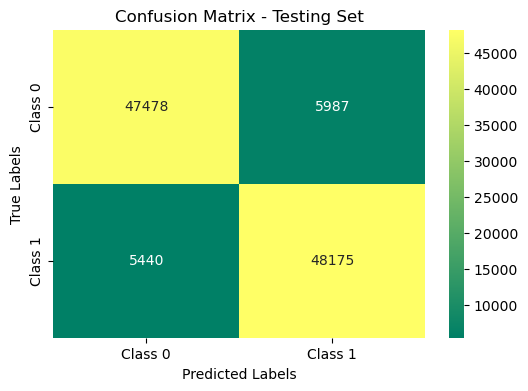

In [99]:
evaluate_model(rf_model,X_Over_train,X_Over_test,y_Over_train,y_Over_test)

### 5.Xgboost

#### without oversampling

In [100]:
xg = XGBClassifier()

Training Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    267700
           1       0.73      0.05      0.09     37187

    accuracy                           0.88    304887
   macro avg       0.81      0.52      0.51    304887
weighted avg       0.86      0.88      0.83    304887

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.46      0.03      0.05      9523

    accuracy                           0.87     76222
   macro avg       0.67      0.51      0.49     76222
weighted avg       0.83      0.87      0.82     76222

Training Accuracy: 0.8819
Testing Accuracy: 0.8745


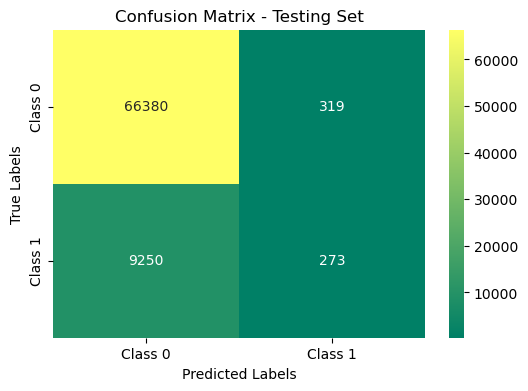

In [101]:
evaluate_model(xg,X_train, X_test, y_train, y_test)

#### with oversampling

In [524]:
xg = XGBClassifier()

Training Performance:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89    214235
           1       0.89      0.89      0.89    214085

    accuracy                           0.89    428320
   macro avg       0.89      0.89      0.89    428320
weighted avg       0.89      0.89      0.89    428320

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     53465
           1       0.89      0.88      0.89     53615

    accuracy                           0.89    107080
   macro avg       0.89      0.89      0.89    107080
weighted avg       0.89      0.89      0.89    107080

Training Accuracy: 0.8917
Testing Accuracy: 0.8874


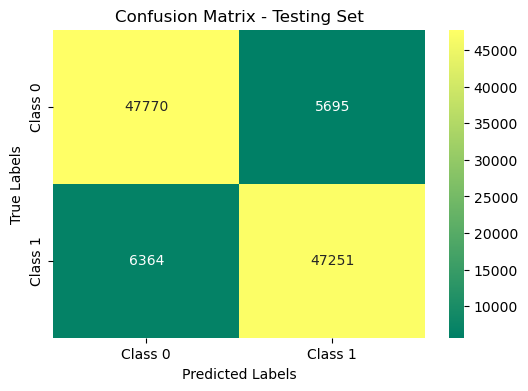

In [102]:
evaluate_model(xg,X_Over_train,X_Over_test,y_Over_train,y_Over_test)

#### Hyperparameter tunning

In [103]:
# Hyperparameter tunning 
param_grid= {"learning_rate"    : [0.05, 0.01, 0.1, 0.20] ,
             "max_depth"        : [ 5, 8, 10, 15],
             "n_estimators"     : [20, 40, 80, 100],
             "min_child_weight" : [ 1, 3, 5, 7 ] }

In [105]:
clf = RandomizedSearchCV(xg, param_distributions = param_grid, cv =4, verbose=True, n_jobs=-1)

In [106]:
best_clf = clf.fit(X_Over_train,y_Over_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


In [108]:
best_para = best_clf.best_params_

In [111]:
# Xgboost with hyperparameter
xgb_model = XGBClassifier(n_estimators=80, min_child_weight=7, max_depth=15,learning_rate=0.2)

Training Performance:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89    214235
           1       0.89      0.89      0.89    214085

    accuracy                           0.89    428320
   macro avg       0.89      0.89      0.89    428320
weighted avg       0.89      0.89      0.89    428320

**************************************************
Testing Performance:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     53465
           1       0.89      0.88      0.89     53615

    accuracy                           0.89    107080
   macro avg       0.89      0.89      0.89    107080
weighted avg       0.89      0.89      0.89    107080

Training Accuracy: 0.8917
Testing Accuracy: 0.8874


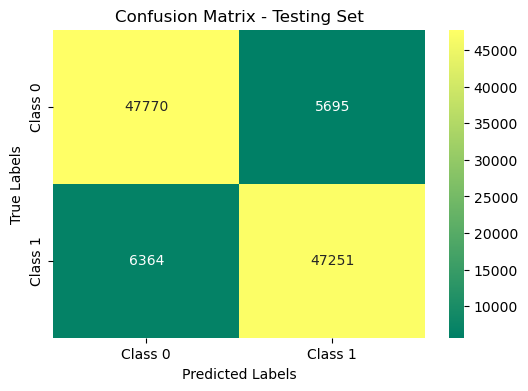

In [112]:
evaluate_model(xg,X_Over_train,X_Over_test,y_Over_train,y_Over_test)

### Model Selection:

- Random Forest (with oversampling and hyperparameter tuning) shines in its high precision, recall, and F1-score for both classes. It's consistently robust on training and testing datasets, and tuning has boosted its accuracy.

- XGBoost (also with oversampling and tuning) tackles class imbalance well, improving metrics for the minority class. The tuning strikes a balance between precision and recall, making it effective in predicting both classes.

- In conclusion, both models perform strongly across metrics. Random Forest stands out for its balance, while XGBoost shows versatility in handling class imbalance. The choice between them would hinge on project needs, like the emphasis on identifying the minority class or balancing precision and recall.

### Conclusion:

- In conclusion, the Health Insurance Cross Sell Prediction project successfully identified key insights from the dataset. The analysis revealed an imbalanced dataset, with a majority of individuals showing little interest in health insurance cross-sell. 
- Gender analysis indicated a slightly higher interest among males. Age-wise, middle-aged individuals exhibited the highest interest, while younger and older populations showed lower interest levels. Driving license holders were the primary target for cross-selling, but the response varied, suggesting a nuanced relationship between license possession and interest. 
- Previous insurance history also played a role, with those without prior insurance showing higher interest. Vehicle age and damage were influential factors, with older vehicles and damaged ones associated with increased interest. The rejection of null hypotheses reinforced the significance of age and vehicle damage in predicting health insurance interest. 
- These findings provide valuable insights for targeted marketing and product customization in the health insurance cross-sell domain.

### Future work:

 - Enhancing Health Insurance Cross Sell Prediction by leveraging ensemble techniques like stacking or boosting for improved accuracy through diverse model integration.

 - Improving efficiency in Health Insurance Cross Sell Prediction by implementing transfer learning through pre-training on a related insurance domain dataset, followed by fine-tuning.

 - Developing a deployable, user-friendly application for real-time health insurance cross-selling predictions, ensuring seamless integration into operational environments.

 - Using ROC curve analysis to assess the classification model's performance, providing insights into sensitivity and specificity trade-offs for optimized decision-making in the insurance domain.